In [1]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# Display the image using Matplotlib
def show_image(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

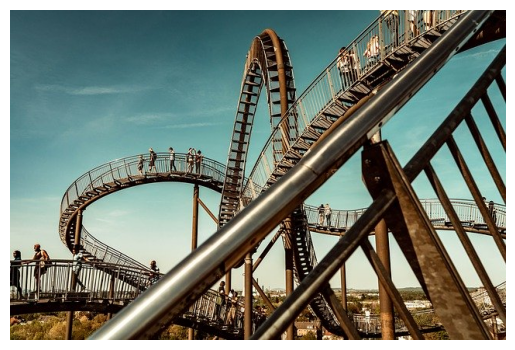

In [5]:
image_path = '/content/drive/My Drive/Colab Notebooks/CS4722 - Image scaling assignment/image.jpg'

# Load the image using cv2
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

show_image(image_rgb)

In [6]:
print(image_rgb.shape)
image_rgb

(426, 640, 3)


array([[[ 51,  85,  94],
        [ 49,  83,  92],
        [ 48,  82,  91],
        ...,
        [ 10,   1,   0],
        [ 10,   1,   0],
        [ 11,   2,   0]],

       [[ 50,  84,  93],
        [ 48,  82,  91],
        [ 47,  81,  90],
        ...,
        [  9,   0,   0],
        [  7,   0,   0],
        [  7,   0,   0]],

       [[ 49,  83,  92],
        [ 48,  82,  91],
        [ 47,  81,  90],
        ...,
        [ 14,   4,   3],
        [ 14,   6,   4],
        [ 14,   6,   4]],

       ...,

       [[ 95,  80,  23],
        [ 64,  52,   0],
        [ 62,  47,   0],
        ...,
        [ 88,  52,  26],
        [131,  96,  68],
        [108,  73,  41]],

       [[ 89,  76,  21],
        [ 64,  53,   0],
        [ 44,  31,   0],
        ...,
        [115,  79,  47],
        [113,  77,  43],
        [116,  81,  43]],

       [[ 99,  88,  34],
        [ 75,  64,  10],
        [ 53,  41,   0],
        ...,
        [132,  96,  62],
        [119,  81,  44],
        [121,  83,  44]]

In [7]:
height, width, c = image_rgb.shape

grayscale_image = np.empty_like(image_rgb)

# Convert each pixel to grayscale using luminance formula
for i in range(height):
    for j in range(width):
        r, g, b = image_rgb[i, j]
        luminance = int(0.299 * r + 0.587 * g + 0.114 * b)
        grayscale_image[i][j] = [luminance, luminance, luminance]

In [8]:
grayscale_image.shape

(426, 640, 3)

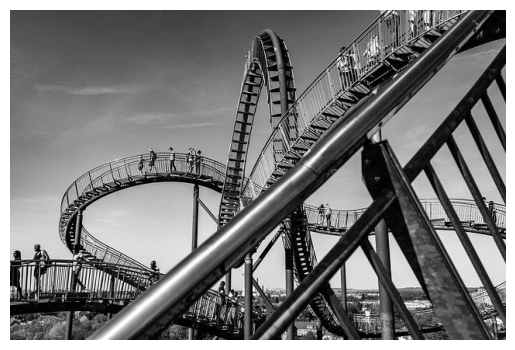

In [9]:
show_image(grayscale_image)

In [10]:
def resample(image, scale):
  height, width, c = image.shape

  new_height = int(height * scale)
  new_width = int(width * scale)

  # Create an empty array for the resized image
  resized_image = np.zeros((new_height, new_width, 3), dtype=np.uint8)

  # Perform nearest-neighbor interpolation
  for i in range(new_height):
      for j in range(new_width):
          old_i = int(i /scale)
          old_j = int(j / scale)
          resized_image[i, j] = image[old_i, old_j]

  return resized_image

In [11]:
resampled_image_1 = resample(grayscale_image, 0.7)

In [12]:
resampled_image_1.shape

(298, 448, 3)

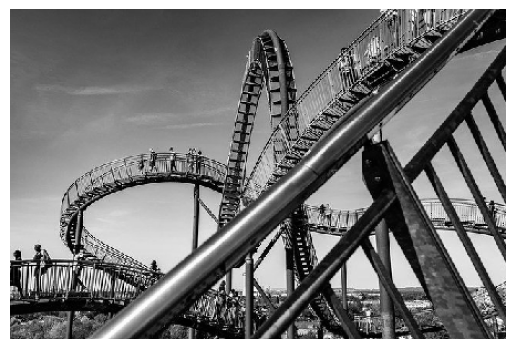

In [14]:
show_image(resampled_image_1)

In [15]:
resampled_image_2 = resample(resampled_image_1, 1/0.7)

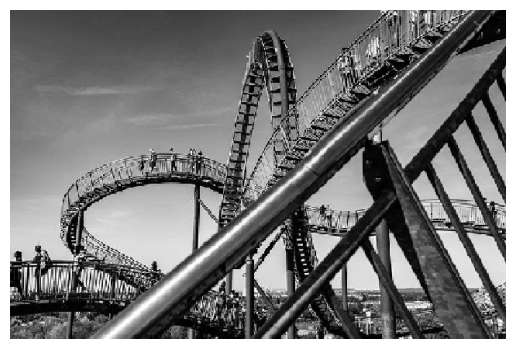

In [16]:
show_image(resampled_image_2)

In [17]:
resampled_image_2.shape

(425, 640, 3)

In [18]:
new_height,new_width,channels = resampled_image_2.shape
sum_avg_squared_diff = 0

for i in range(new_height):
    for j in range(new_width):
        squared_diff = (image_rgb[i][j] - resampled_image_2[i][j]) ** 2
        sum_avg_squared_diff += squared_diff

num_common_pixels = new_height * new_width
final_value = sum_avg_squared_diff / num_common_pixels
print(final_value)

[0.00086765 0.00029779 0.00041176]


In [19]:
final_value

array([0.00086765, 0.00029779, 0.00041176])

In [20]:
sum(final_value)

0.0015772058823529413

In [21]:
output_path = '/content/drive/My Drive/Colab Notebooks/CS4722 - Image scaling assignment/resized_image.jpg'

# Write the image data to a new file
cv2.imwrite(output_path, resampled_image_2)

print("Resized image saved to:", output_path)

Resized image saved to: /content/drive/My Drive/Colab Notebooks/CS4722 - Image scaling assignment/resized_image.jpg
